# Ćwiczenie 308

### Wyznaczanie promienia krzywizny soczewki za pomocą pierścieni Newtona

Celem ćwiczenia jest wyznaczanie promieni pierścieni Newtona, a za ich pomocą obliczenie promieni krzywizny soczewek. By wykonać ćwiczenie najpierw należy określić położenie jasnych pierścieni względem ich środka. Następnie należy obliczyć ich promienie $m$ i sporządzić wykres $r^{2} = f(m - \frac{1}{2})$. Z wykorzystaniem regresji liniowej należy obliczyć współczynnik nachylenia, a z jego wykorzystaniem promień krzywizny soczewki.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
sns.set_theme(style="whitegrid")

### Dane zmierzone

$$
    \Delta d = 0.01{mm} \\
    \lambda = 589.6{nm}
$$

In [3]:
initial_data = [[4.57, 4.31, 4.07, 3.83, 3.76, 3.61, 3.49, 3.38, 3.28],
                [6.13, 6.43, 6.62, 6.81, 6.94, 7.14, 7.26, 7.41, 7.52],
                [17.65, 17.41, 17.16, 16.98, 16.81, 16.68, 16.54, 16.43, 16.36],
                [19.26, 19.53, 19.78, 19.93, 20.11, 20.22, 20.41, 20.53, 20.64]]
initial_data = np.array(initial_data).transpose()
rows = np.arange(1,10)
columns = ['dp', 'dl', 'dg', 'dd']

df = pd.DataFrame(initial_data, index=rows, columns=columns)

delta_d = 0.01
light_len = 589.6

In [4]:
df

,dp,dl,dg,dd
1,4.57,6.13,17.65,19.26
2,4.31,6.43,17.41,19.53
3,4.07,6.62,17.16,19.78
4,3.83,6.81,16.98,19.93
5,3.76,6.94,16.81,20.11
6,3.61,7.14,16.68,20.22
7,3.49,7.26,16.54,20.41
8,3.38,7.41,16.43,20.53
9,3.28,7.52,16.36,20.64


# Obliczenia

1. Obliczenie promieni poszczególnych prążków

In [5]:
df2 = pd.DataFrame()

In [6]:
df2

""


In [7]:
df2['rx'] = (df['dl']  - df['dp'])/ 2
df2['ry'] = (df['dd']  - df['dg'])/ 2

In [8]:
df2

,rx,ry
1,0.780,0.805
2,1.060,1.060
3,1.275,1.310
4,1.490,1.475
5,1.590,1.650
6,1.765,1.770
7,1.885,1.935
8,2.015,2.050
9,2.120,2.140


2. Obliczenie średniego promienia prążków

In [9]:
df2['r'] = (df2['rx'] + df2['ry']) / 2

In [10]:
df2

,rx,ry,r
1,0.780,0.805,0.7925
2,1.060,1.060,1.0600
3,1.275,1.310,1.2925
4,1.490,1.475,1.4825
5,1.590,1.650,1.6200
6,1.765,1.770,1.7675
7,1.885,1.935,1.9100
8,2.015,2.050,2.0325
9,2.120,2.140,2.1300


2. Obliczenie kwadratów promieni prążków

In [11]:
df2['r2'] = (df2['r'])**2

In [12]:
df2

,rx,ry,r,r2
1,0.780,0.805,0.7925,0.628056
2,1.060,1.060,1.0600,1.123600
3,1.275,1.310,1.2925,1.670556
4,1.490,1.475,1.4825,2.197806
5,1.590,1.650,1.6200,2.624400
6,1.765,1.770,1.7675,3.124056
7,1.885,1.935,1.9100,3.648100
8,2.015,2.050,2.0325,4.131056
9,2.120,2.140,2.1300,4.536900


3. Tworzenie wykresu $r^2 = f(m - \frac{1}{2})$

In [13]:
df2['m - 0.5'] = np.arange(1, 10) - 0.5

In [14]:
df2

,rx,ry,r,r2,m - 0.5
1,0.780,0.805,0.7925,0.628056,0.5
2,1.060,1.060,1.0600,1.123600,1.5
3,1.275,1.310,1.2925,1.670556,2.5
4,1.490,1.475,1.4825,2.197806,3.5
5,1.590,1.650,1.6200,2.624400,4.5
6,1.765,1.770,1.7675,3.124056,5.5
7,1.885,1.935,1.9100,3.648100,6.5
8,2.015,2.050,2.0325,4.131056,7.5
9,2.120,2.140,2.1300,4.536900,8.5


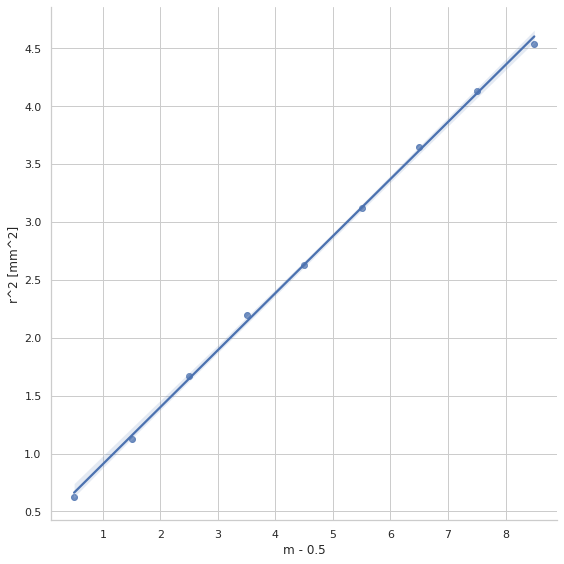

In [15]:
plot = sns.lmplot(x='m - 0.5', y='r2', data=df2, height=8)
plot.set(xlabel="m - 0.5", ylabel="r^2 [mm^2]")
plt.show()

4. Obliczenie współczynnika nachylenia, punktu przecięcia i błędu standardowego

In [16]:
x = df2['m - 0.5']
y = df2['r2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [17]:
values = [slope, intercept, std_err]
rows = ['slope', 'intercept', 'std_err']
columns = ['values']
df3 = pd.DataFrame(data=values, columns=columns, index=rows)

In [18]:
df3

,values
slope,0.492318
intercept,0.416183
std_err,0.005297


5. Obliczenie promienia krzywizny soczewki

In [19]:
curv_radius = slope * 100000 / light_len
delta_curv_radius = curv_radius * (abs(std_err / slope) + abs(-1 * 0.1/light_len))
df3.loc['curv_radius'] = curv_radius
df3.loc['delta_curv_radius'] = delta_curv_radius

In [20]:
df3

,values
slope,0.492318
intercept,0.416183
std_err,0.005297
curv_radius,83.500343
delta_curv_radius,0.912628


In [21]:
print(df2.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &     rx &     ry &       r &        r2 &  m - 0.5 \\
\midrule
1 &  0.780 &  0.805 &  0.7925 &  0.628056 &      0.5 \\
2 &  1.060 &  1.060 &  1.0600 &  1.123600 &      1.5 \\
3 &  1.275 &  1.310 &  1.2925 &  1.670556 &      2.5 \\
4 &  1.490 &  1.475 &  1.4825 &  2.197806 &      3.5 \\
5 &  1.590 &  1.650 &  1.6200 &  2.624400 &      4.5 \\
6 &  1.765 &  1.770 &  1.7675 &  3.124056 &      5.5 \\
7 &  1.885 &  1.935 &  1.9100 &  3.648100 &      6.5 \\
8 &  2.015 &  2.050 &  2.0325 &  4.131056 &      7.5 \\
9 &  2.120 &  2.140 &  2.1300 &  4.536900 &      8.5 \\
\bottomrule
\end{tabular}

